In [18]:
import numpy as np
import SimpleITK as sitk
import os

path_entropy = "/home/awias/data/nnUNet_TEST/11_0000_pred.nii.gz.npz"
path_img = "/home/awias/data/nnUNet_TEST/11_0000.nii.gz"
path_msk = "/home/awias/data/nnUNet_TEST/11.nii.gz"

output_dir = "/home/awias/data/nnUNet_TEST/output"

os.makedirs(output_dir, exist_ok=True)

data = np.load(path_entropy)

# print(data['probabilities'])
print(data['probabilities'].shape)


img_sitk = sitk.ReadImage(path_img)
img = sitk.GetArrayFromImage(img_sitk)
print(img.shape)

msk_sitk = sitk.ReadImage(path_msk)
msk = sitk.GetArrayFromImage(msk_sitk)
print(msk.shape)




data_channel0 = data['probabilities'][0]
data_channel1 = data['probabilities'][1]

entropy = - (data_channel0 * np.log2(data_channel0 + 1e-10) + data_channel1 * np.log2(data_channel1 + 1e-10))

(2, 431, 311, 311)
(431, 311, 311)
(431, 311, 311)


In [10]:
# Check if everything sums to one
sums = data_channel0 + data_channel1
print(sums.min(), sums.max())

0.99999994 1.0


In [11]:
# Save data
data_channel0_sitk = sitk.GetImageFromArray(data_channel0)
data_channel0_sitk.CopyInformation(img_sitk)
sitk.WriteImage(data_channel0_sitk, os.path.join(output_dir, "data_channel0.nii.gz"))

data_channel1_sitk = sitk.GetImageFromArray(data_channel1)
data_channel1_sitk.CopyInformation(img_sitk)
sitk.WriteImage(data_channel1_sitk, os.path.join(output_dir, "data_channel1.nii.gz"))

entropy_sitk = sitk.GetImageFromArray(entropy)
entropy_sitk.CopyInformation(img_sitk)
sitk.WriteImage(entropy_sitk, os.path.join(output_dir, "entropy.nii.gz"))

In [12]:
import tools as tools

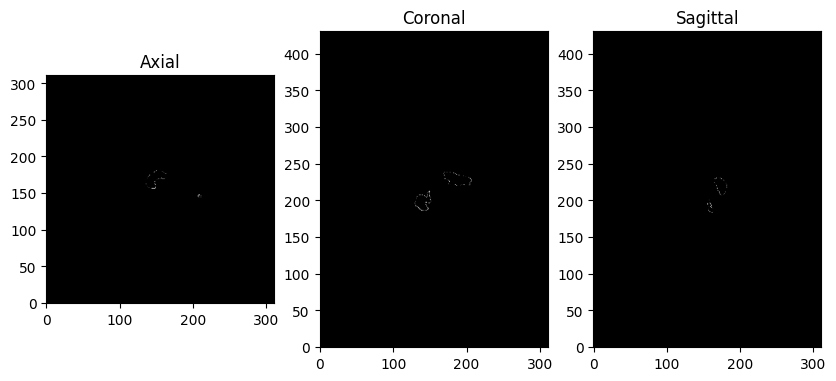

In [16]:
tools.plot_central_slice_img_zyx(entropy)

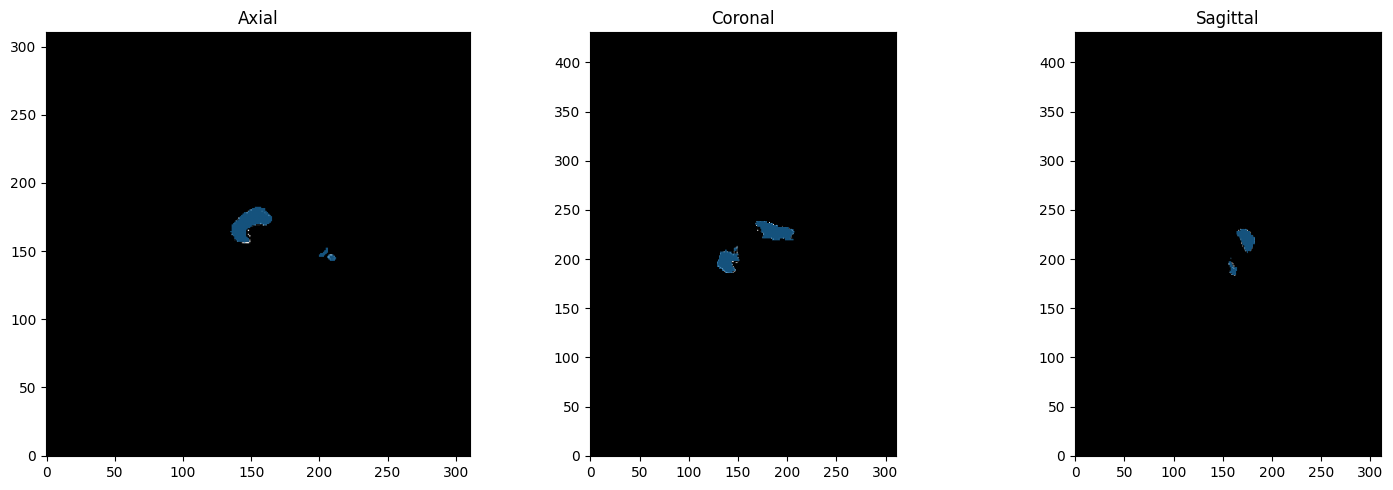

In [19]:
tools.plot_central_slice_img_mask_zyx(entropy, msk)

In [ ]:
# Cal